In [199]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,os

In [200]:
DF=pd.read_excel(r'C:\Users\rakes\Downloads\07 Customer Churn Case Study Data.xlsx',sheet_name='Data')

In [201]:
DF.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [202]:
DF['num_cs_calls'].nunique()

10

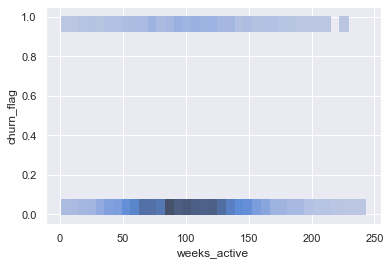

In [203]:
sns.set_theme()
sns.histplot(data=DF,x='weeks_active',y='churn_flag');


In [240]:
churned=DF[DF.churn_flag==1]
non_churned=DF[DF.churn_flag==0]


In [205]:
DF.avg_talk_time.describe([0.01,0.99])

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
1%         51.832000
50%       179.400000
99%       305.168000
max       350.800000
Name: avg_talk_time, dtype: float64

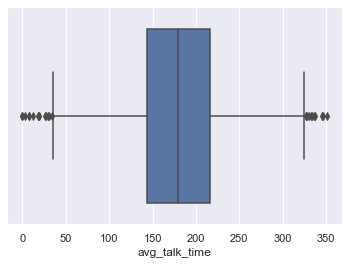

In [206]:
sns.boxplot(data=DF,x='avg_talk_time');

In [207]:
import numpy as np
DF['avg_talk_time_wo']=np.where(DF['avg_talk_time']>305,305,DF['avg_talk_time'])

In [208]:
DF.avg_talk_time_wo.describe()

count    3333.000000
mean      179.603930
std        54.032281
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       305.000000
Name: avg_talk_time_wo, dtype: float64

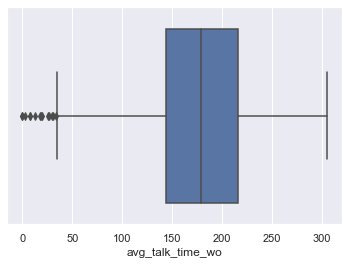

In [209]:
sns.boxplot(data=DF,x='avg_talk_time_wo');

In [210]:
DF['avg_talk_time_wo']=np.where(DF['avg_talk_time_wo']<51,50,DF['avg_talk_time_wo'])

In [211]:
DF.avg_talk_time_wo.describe()

count    3333.000000
mean      179.773387
std        53.572803
min        50.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       305.000000
Name: avg_talk_time_wo, dtype: float64

In [212]:
DF.avg_talk_time_wo.describe([0.01,0.99]).round()

count    3333.0
mean      180.0
std        54.0
min        50.0
1%         52.0
50%       179.0
99%       305.0
max       305.0
Name: avg_talk_time_wo, dtype: float64

In [213]:
DF.weeks_active.describe([0.01,0.99])

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
1%         12.320000
50%       101.000000
99%       195.000000
max       243.000000
Name: weeks_active, dtype: float64

In [226]:
DF['weeks_active_wo']=np.where(DF['weeks_active']>195,200,DF['weeks_active'])
DF['weeks_active_wo']=np.where(DF['weeks_active_wo']<12,10,DF['weeks_active_wo'])

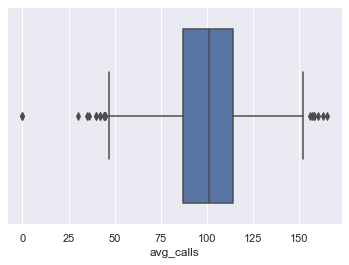

In [214]:
sns.boxplot(data=DF,x='avg_calls');

In [215]:
DF.avg_calls.describe([0.01,0.99])

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
1%         54.000000
50%       101.000000
99%       146.000000
max       165.000000
Name: avg_calls, dtype: float64

In [225]:
DF['avg_calls_wo']=np.where(DF['avg_calls']<54,50,DF['avg_calls'])
DF['avg_calls_wo']=np.where(DF['avg_calls_wo']>146,150,DF['avg_calls_wo'])

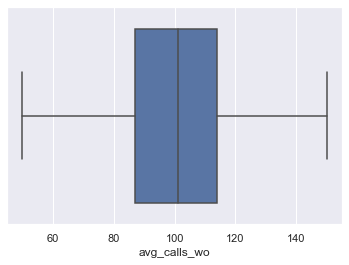

In [217]:
sns.boxplot(data=DF,x='avg_calls_wo');

In [218]:
DF.mth_bill.describe([0.01,0.99,0.95,0.96,0.97,0.98])

count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
1%         26.000000
50%        53.500000
95%        87.800000
96%        90.072000
97%        91.904000
98%        93.400000
99%        98.280000
max       111.300000
Name: mth_bill, dtype: float64

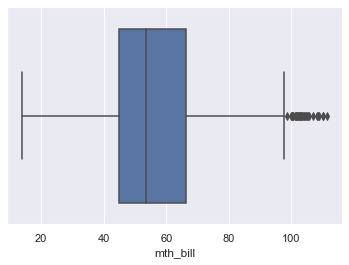

In [219]:
sns.boxplot(data=DF,x='mth_bill');

In [220]:
DF['mth_bill_wo']=np.where(DF['mth_bill']>98,100,DF['mth_bill'])


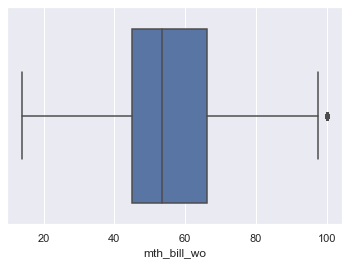

In [221]:
sns.boxplot(data=DF,x='mth_bill_wo');

In [223]:
DF

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0,265.1,110,89.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0,161.6,123,82.0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0,243.4,114,52.0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0,299.4,71,57.0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0,166.7,113,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0,156.2,77,71.7
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0,231.1,57,56.4
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0,180.8,109,56.0
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0,213.8,105,50.0


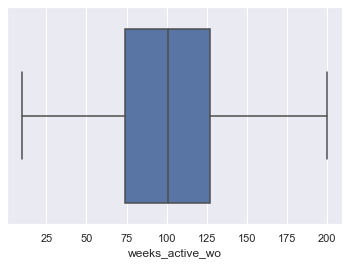

In [227]:
sns.boxplot(data=DF,x='weeks_active_wo');

In [228]:
DF.describe([0.01,0.99,0.05,0.95])

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294,0.144914,179.773387,100.483948,56.267057,101.009001
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840,0.352067,53.572803,19.812403,16.316723,39.447527
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,50.000000,50.000000,14.000000,10.000000
1%,12.320000,0.000000,0.000000,0.000000,0.000000,51.832000,54.000000,26.000000,3.979600,3.332000,0.000000,51.832000,54.000000,26.000000,12.320000
5%,35.000000,0.000000,0.000000,0.000000,0.000000,89.920000,67.000000,33.260000,5.940000,5.700000,0.000000,89.920000,67.000000,33.260000,35.000000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000,0.000000,179.400000,101.000000,53.500000,101.000000
95%,167.000000,1.000000,1.000000,3.460000,4.000000,270.740000,133.000000,87.800000,14.220000,14.700000,1.000000,270.740000,133.000000,87.800000,167.000000
99%,195.000000,1.000000,1.000000,4.100000,6.000000,305.168000,146.000000,98.280000,15.946800,16.668000,1.000000,305.000000,146.000000,99.232000,195.000000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000,1.000000,305.000000,150.000000,100.000000,200.000000


In [229]:
DF.drop(['weeks_active','avg_talk_time','avg_calls','mth_bill'],axis=1,inplace=True)

In [230]:
DF.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,3333.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
dataplan_flag,3333.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
data_usage,3333.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0
num_cs_calls,3333.0,2.0,1.0,0.0,1.0,1.0,2.0,9.0
overagefee,3333.0,10.0,3.0,0.0,8.0,10.0,12.0,18.0
roam_mins,3333.0,10.0,3.0,0.0,8.0,10.0,12.0,20.0
churn_flag,3333.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
avg_talk_time_wo,3333.0,180.0,54.0,50.0,144.0,179.0,216.0,305.0
avg_calls_wo,3333.0,100.0,20.0,50.0,87.0,101.0,114.0,150.0
mth_bill_wo,3333.0,56.0,16.0,14.0,45.0,54.0,66.0,100.0


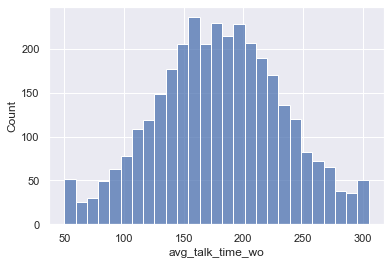

In [231]:
sns.histplot(data=DF,x='avg_talk_time_wo');

In [232]:
non_churned=DF[DF.churn_flag==0]
non_churned

,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
0,1,1,2.70,1,9.87,10.0,0,265.1,110,89.0,128
1,1,1,3.70,1,9.78,13.7,0,161.6,123,82.0,107
2,1,0,0.00,0,6.06,12.2,0,243.4,114,52.0,137
3,0,0,0.00,2,3.10,6.6,0,299.4,71,57.0,84
4,0,0,0.00,3,7.42,10.1,0,166.7,113,41.0,75
...,...,...,...,...,...,...,...,...,...,...,...
3328,1,1,2.67,2,10.78,9.9,0,156.2,77,71.7,192
3329,1,0,0.34,3,7.67,9.6,0,231.1,57,56.4,68
3330,1,0,0.00,2,14.44,14.1,0,180.8,109,56.0,28
3331,0,0,0.00,2,7.98,5.0,0,213.8,105,50.0,184


In [233]:
(churned.weeks_active.value_counts())

105    9
119    9
93     8
115    8
113    8
      ..
104    1
114    1
140    1
141    1
225    1
Name: weeks_active, Length: 164, dtype: int64

In [234]:
DF.describe([0.01,0.99,0.05,0.75,0.95,0.25]).T.round()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
conrenew_flag,3333.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
dataplan_flag,3333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
data_usage,3333.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0
num_cs_calls,3333.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,6.0,9.0
overagefee,3333.0,10.0,3.0,0.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0
roam_mins,3333.0,10.0,3.0,0.0,3.0,6.0,8.0,10.0,12.0,15.0,17.0,20.0
churn_flag,3333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
avg_talk_time_wo,3333.0,180.0,54.0,50.0,52.0,90.0,144.0,179.0,216.0,271.0,305.0,305.0
avg_calls_wo,3333.0,100.0,20.0,50.0,54.0,67.0,87.0,101.0,114.0,133.0,146.0,150.0
mth_bill_wo,3333.0,56.0,16.0,14.0,26.0,33.0,45.0,54.0,66.0,88.0,99.0,100.0


In [235]:
churned.describe().T

,count,mean,std,min,25%,50%,75%,max
weeks_active,483.0,102.664596,39.467820,1.00,76.00,103.00,127.000,225.00
conrenew_flag,483.0,0.716356,0.451233,0.00,0.00,1.00,1.000,1.00
dataplan_flag,483.0,0.165631,0.372135,0.00,0.00,0.00,0.000,1.00
data_usage,483.0,0.546957,1.155352,0.00,0.00,0.00,0.295,5.40
num_cs_calls,483.0,2.229814,1.853275,0.00,1.00,2.00,4.000,9.00
avg_talk_time,483.0,206.914079,68.997792,0.00,153.25,217.60,265.950,350.80
avg_calls,483.0,101.335404,21.582307,0.00,87.50,103.00,116.500,165.00
mth_bill,483.0,59.190062,16.065479,14.00,45.00,63.00,69.000,110.00
overagefee,483.0,10.623085,2.586433,3.55,8.86,10.57,12.475,18.19
roam_mins,483.0,10.700000,2.793190,2.00,8.80,10.60,12.800,20.00


In [236]:
non_churned.describe().T

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,2850.0,0.934737,0.247033,0.0,1.000,1.00,1.000,1.00
dataplan_flag,2850.0,0.295439,0.456320,0.0,0.000,0.00,1.000,1.00
data_usage,2850.0,0.862151,1.286095,0.0,0.000,0.00,2.000,4.75
num_cs_calls,2850.0,1.449825,1.163883,0.0,1.000,1.00,2.000,8.00
overagefee,2850.0,9.954618,2.514629,0.0,8.230,9.98,11.660,18.09
roam_mins,2850.0,10.158877,2.784489,0.0,8.400,10.20,12.000,18.90
churn_flag,2850.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00
avg_talk_time_wo,2850.0,175.340877,49.646034,50.0,142.825,177.20,210.300,305.00
avg_calls_wo,2850.0,100.317193,19.608356,50.0,87.000,100.00,114.000,150.00
mth_bill_wo,2850.0,55.781439,16.338094,15.7,45.000,53.00,64.675,100.00


In [237]:
DF.describe([0.01,0.99])

,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.903090,0.276628,0.816475,1.562856,10.051488,10.237294,0.144914,179.773387,100.483948,56.267057,101.009001
std,0.295879,0.447398,1.272668,1.315491,2.535712,2.791840,0.352067,53.572803,19.812403,16.316723,39.447527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,14.000000,10.000000
1%,0.000000,0.000000,0.000000,0.000000,3.979600,3.332000,0.000000,51.832000,54.000000,26.000000,12.320000
50%,1.000000,0.000000,0.000000,1.000000,10.070000,10.300000,0.000000,179.400000,101.000000,53.500000,101.000000
99%,1.000000,1.000000,4.100000,6.000000,15.946800,16.668000,1.000000,305.000000,146.000000,99.232000,195.000000
max,1.000000,1.000000,5.400000,9.000000,18.190000,20.000000,1.000000,305.000000,150.000000,100.000000,200.000000


## SECTION 4

### 1.Compute the below metrics for both Churned and Active customers and comment on any significant difference


### Average Calls

In [238]:
DF.reset_index(inplace=True)

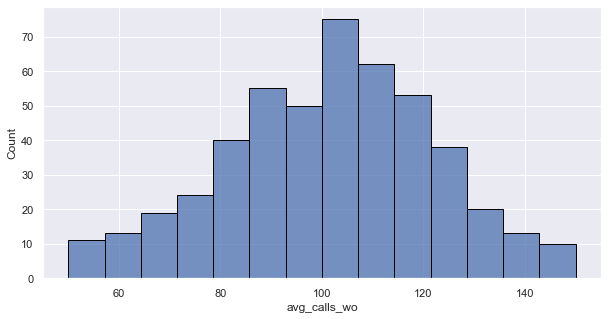

In [241]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='avg_calls_wo',edgecolor='black');

In [ ]:
# Average number of calls made by maximum number of churned per day is around 100

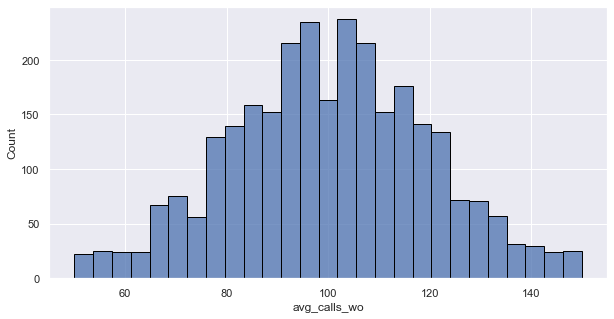

In [242]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churned,x='avg_calls_wo',edgecolor='black');

In [ ]:
# Average number of calls made by maximum number of non churned per day is also around 100

### Average talk time

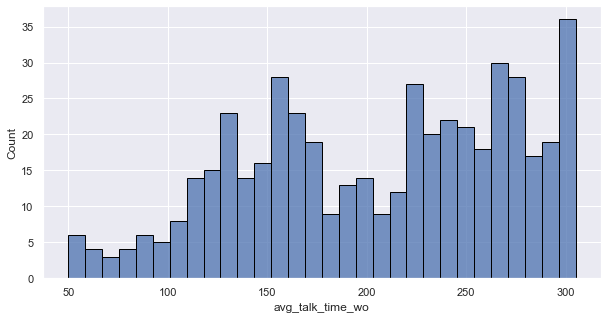

In [243]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='avg_talk_time_wo',edgecolor='black',bins=30);

In [ ]:
#Average talk time of the most of the churned customers lies between 225-300 minutes

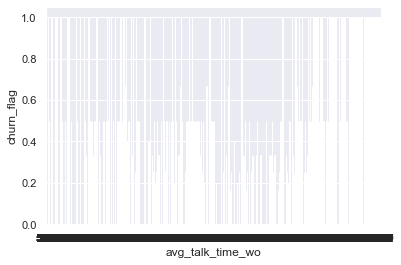

In [244]:
sns.barplot(data=DF,x='avg_talk_time_wo',y='churn_flag',ci=None);

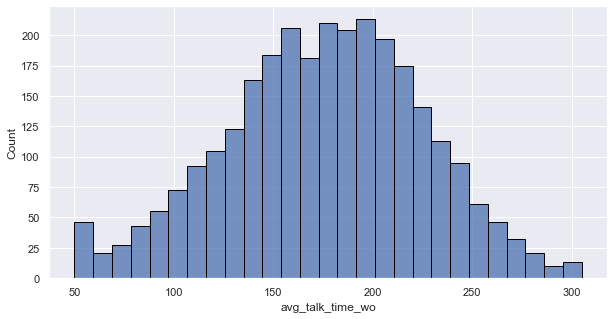

In [245]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churned,x='avg_talk_time_wo',edgecolor='black');

In [246]:
#Average talk time of the maximum number of the non churned customers lies between 170-190 minutes

### Average Monthly Bill

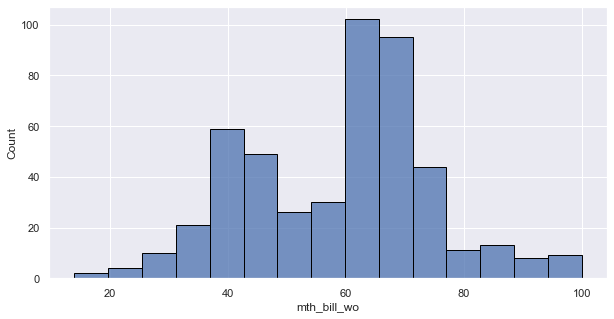

In [247]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='mth_bill_wo',edgecolor='black');

In [248]:
#Average monthly bill of maximum number of churned customers lies between 65-70

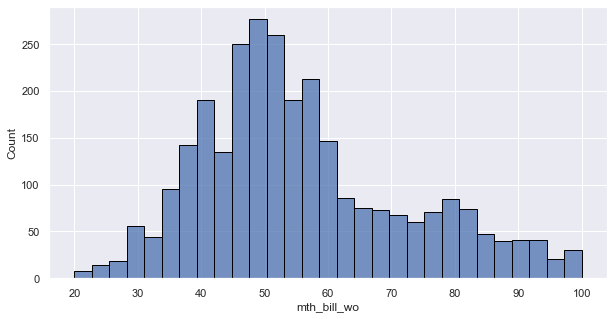

In [249]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churned,x='mth_bill_wo',edgecolor='black',binrange=(20,100));




In [250]:
DF['avg_overallfee']=DF['mth_bill_wo']+DF['overagefee']

In [251]:
DF
churnned=DF[DF['churn_flag']==1]
non_churnned=DF[DF['churn_flag']==0]

In [252]:
churnned

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo,avg_overallfee
10,10,1,0,0.29,4,11.43,12.7,1,129.1,137,44.9,65,56.33
15,15,1,0,0.00,4,15.89,5.4,1,305.0,67,84.0,161,99.89
21,21,1,0,0.00,5,8.50,5.7,1,62.4,89,26.0,77,34.50
33,33,1,0,0.00,1,12.62,11.8,1,249.6,118,64.0,12,76.62
41,41,0,1,3.94,0,10.20,14.6,1,173.1,85,86.4,135,96.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,3301,1,0,0.00,0,10.11,10.4,1,280.0,113,65.0,84,75.11
3304,3304,0,0,0.00,4,9.93,13.8,1,186.1,114,49.0,71,58.93
3320,3320,0,0,0.30,4,9.82,9.7,1,140.0,101,44.0,122,53.82
3322,3322,1,0,0.00,4,13.28,11.5,1,305.0,105,78.0,62,91.28


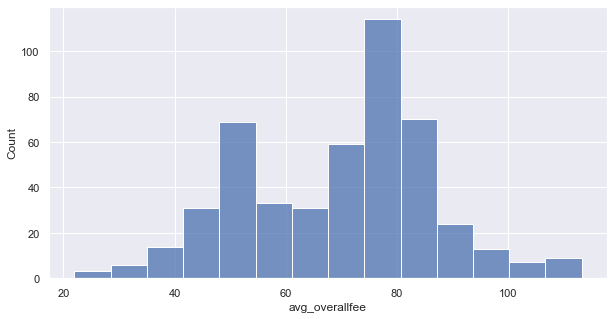

In [253]:
plt.figure(figsize=(10,5))
sns.histplot(data=churnned,x='avg_overallfee');

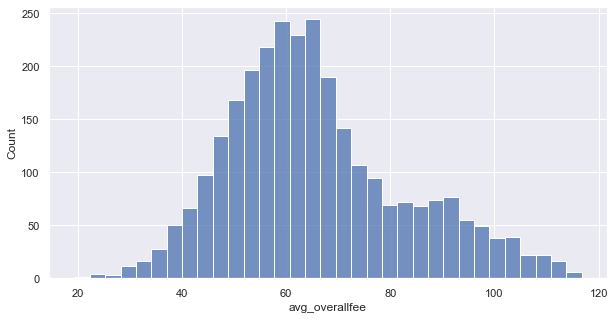

In [254]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churnned,x='avg_overallfee');

In [255]:
#Average monthly bill of maximum number of Non churned customers lies between 50-60

### Average Overage fee

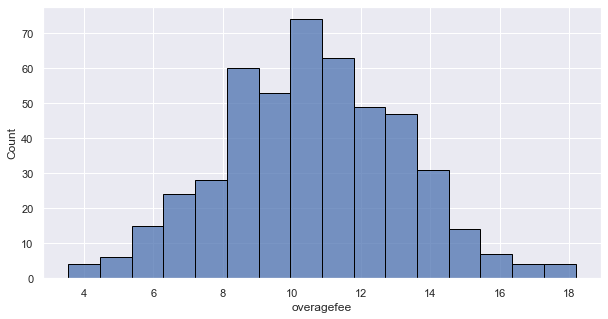

In [256]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='overagefee',edgecolor='black',);

In [257]:
# Average overall fee of the maximum number of churned customers is around 10

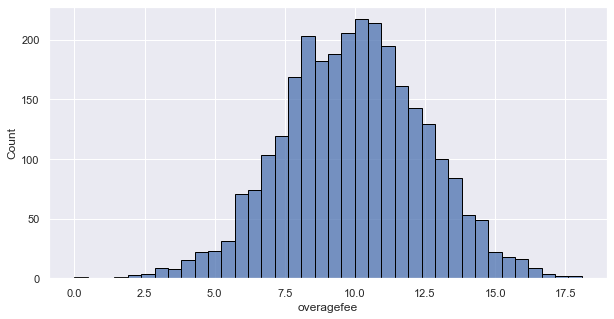

In [258]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churned,x='overagefee',edgecolor='black',);

In [259]:
# Average overall fee of the maximum number of non churned customers is also around 10

### Average Weeks active

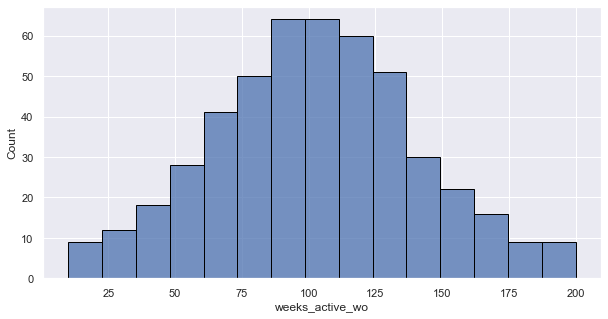

In [260]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='weeks_active_wo',edgecolor='black');

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


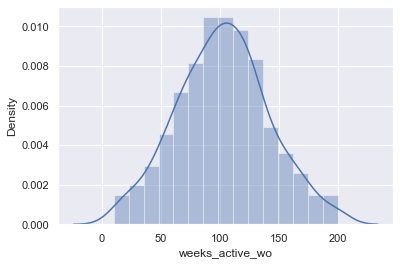

In [261]:
sns.distplot(churned['weeks_active_wo']);

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


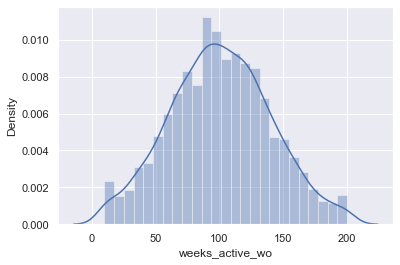

In [262]:
sns.distplot(non_churned['weeks_active_wo']);

In [263]:
#Maximimum number of Churned customers are most likely to be active between 95-120 weeks

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


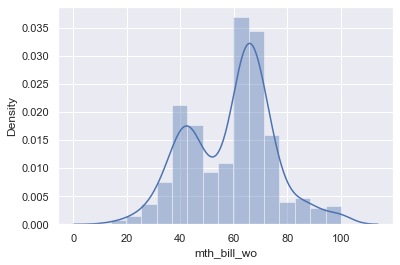

In [264]:
sns.distplot(churned['mth_bill_wo']);

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


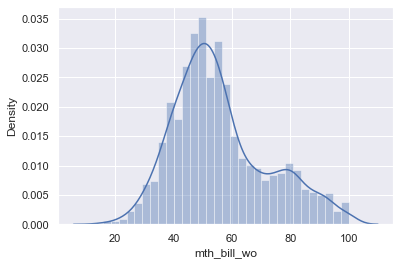

In [265]:
sns.distplot(non_churned['mth_bill_wo']);

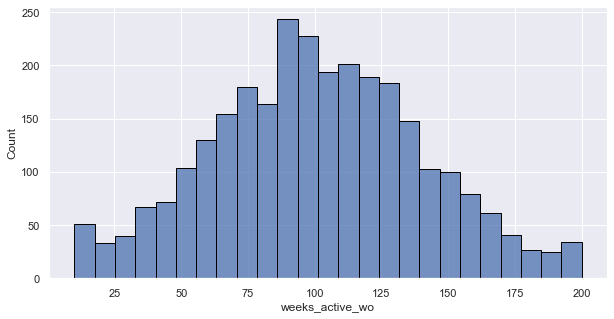

In [266]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_churned,x='weeks_active_wo',edgecolor='black');

In [267]:
#Maximum number of Non_churned customers are mostly active upto 100 weeks

In [268]:
non_churned.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2850.0,1650.064561,961.738436,0.0,818.250,1629.50,2481.750,3332.00
conrenew_flag,2850.0,0.934737,0.247033,0.0,1.000,1.00,1.000,1.00
dataplan_flag,2850.0,0.295439,0.456320,0.0,0.000,0.00,1.000,1.00
data_usage,2850.0,0.862151,1.286095,0.0,0.000,0.00,2.000,4.75
num_cs_calls,2850.0,1.449825,1.163883,0.0,1.000,1.00,2.000,8.00
overagefee,2850.0,9.954618,2.514629,0.0,8.230,9.98,11.660,18.09
roam_mins,2850.0,10.158877,2.784489,0.0,8.400,10.20,12.000,18.90
churn_flag,2850.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00
avg_talk_time_wo,2850.0,175.340877,49.646034,50.0,142.825,177.20,210.300,305.00
avg_calls_wo,2850.0,100.317193,19.608356,50.0,87.000,100.00,114.000,150.00


In [269]:
churned.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
10,10,1,0,0.29,4,11.43,12.7,1,129.1,137,44.9,65
15,15,1,0,0.00,4,15.89,5.4,1,305.0,67,84.0,161
21,21,1,0,0.00,5,8.50,5.7,1,62.4,89,26.0,77
33,33,1,0,0.00,1,12.62,11.8,1,249.6,118,64.0,12
41,41,0,1,3.94,0,10.20,14.6,1,173.1,85,86.4,135


### 2. Observe the ‘Churn Rate’ on different flag variables (such as conrenew_flag, dataplan_flag)

In [270]:
DF.churn_flag.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn_flag, dtype: float64

In [271]:
# 14.5% of the customers are actually being churned

In [272]:
churned.conrenew_flag.value_counts(normalize=True)

1    0.716356
0    0.283644
Name: conrenew_flag, dtype: float64

In [273]:
# 28% of the customers who didnot renewed their contract are being churned
# Minimum of the churned people didnot renewed their contract

In [274]:
churned.dataplan_flag.value_counts(normalize=True)

0    0.834369
1    0.165631
Name: dataplan_flag, dtype: float64

In [275]:
# 83% of the customers who didnot have a Data plan are being churned
# Maximum of the churned people didnot have a data plan

### 3. What kind of relationship ‘Churn Rate’ has with different numerical variables? Use suitable plots to show these results and report your findings. For discrete variables(numeric in nature but with low number of unique values) applying binning to create bins with sufficient and equitable number of data points to observe this relationship (use a different plot type than continuous variables)






In [276]:
churned.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
10,10,1,0,0.29,4,11.43,12.7,1,129.1,137,44.9,65
15,15,1,0,0.00,4,15.89,5.4,1,305.0,67,84.0,161
21,21,1,0,0.00,5,8.50,5.7,1,62.4,89,26.0,77
33,33,1,0,0.00,1,12.62,11.8,1,249.6,118,64.0,12
41,41,0,1,3.94,0,10.20,14.6,1,173.1,85,86.4,135


### Weeks Active

Text(0.5, 1.0, 'Number of weeks active')

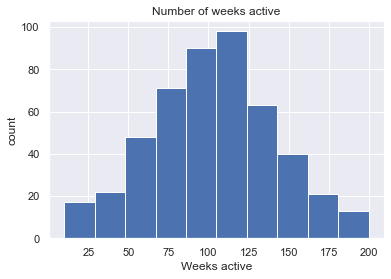

In [277]:
plt.hist(churned['weeks_active_wo']);
plt.xlabel('Weeks active')
plt.ylabel('count')
plt.title('Number of weeks active')

In [278]:
#Maximum Churned customers are active around 100weeks

### Contract Renewed

In [279]:
r=churned.conrenew_flag.value_counts(normalize=True)
r

1    0.716356
0    0.283644
Name: conrenew_flag, dtype: float64

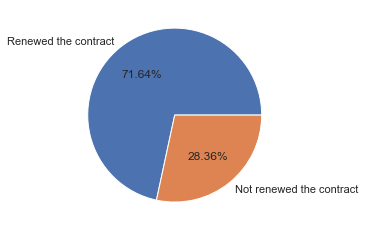

In [280]:
plt.pie(r,labels=['Renewed the contract','Not renewed the contract'],autopct='%1.2f%%');

In [281]:
# 71 percentage of the churned customers did renewed their contract recently
# 28 percentage of the churned customers didnot renewed their contract recently

### Dataplan

In [282]:
a=churned.dataplan_flag.value_counts(normalize=True)
a

0    0.834369
1    0.165631
Name: dataplan_flag, dtype: float64

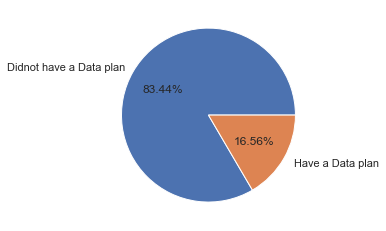

In [283]:
plt.pie(a,labels=['Didnot have a Data plan',' Have a Data plan'],autopct='%1.2f%%');

In [284]:

# 16 percentage of the churned customers  have a Data plan
# 83 percentage of the churned customers didnot have a Data plan

### Data Usage

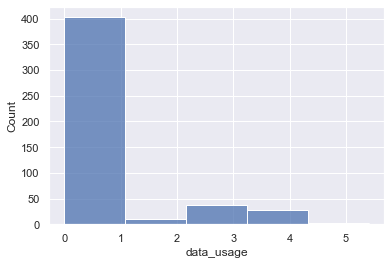

In [285]:
sns.histplot(data=churned,x='data_usage',bins=5);

In [286]:
# Maximum number of churned customers did not use any amount of Data 
# In fact many of them didnot have any DataPlan

### Customer service calls

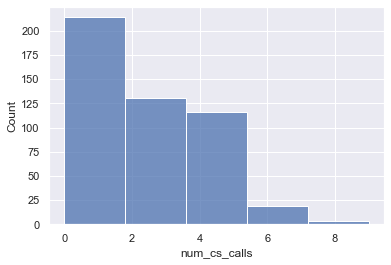

In [287]:
sns.histplot(data=churned,x='num_cs_calls',bins=5);

In [288]:
# Maximum number of churned customers,i.e, 25% made a single call
# similarly 19% have did not make any calls
# 18% of churned customers made two calls
# 15% of churned customers made four calls


In [289]:
churned.num_cs_calls.value_counts(normalize=True)

1    0.252588
0    0.190476
2    0.180124
4    0.157350
3    0.091097
5    0.082816
6    0.028986
7    0.010352
9    0.004141
8    0.002070
Name: num_cs_calls, dtype: float64

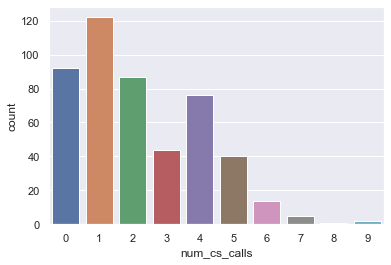

In [290]:
sns.countplot(data=churned,x='num_cs_calls');

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


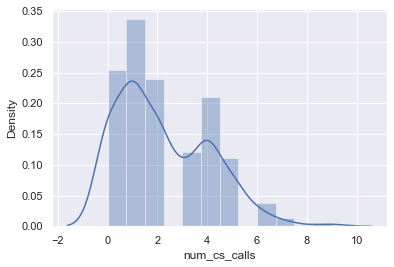

In [291]:
sns.distplot(churned['num_cs_calls']);

### Average talk time

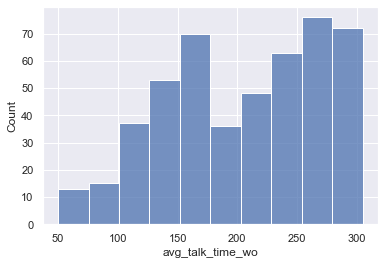

In [293]:
sns.histplot(data=churned,x='avg_talk_time_wo');

In [ ]:
#Average talk time of the most of the churned customers lies between 225-280 minutes

### Average calls

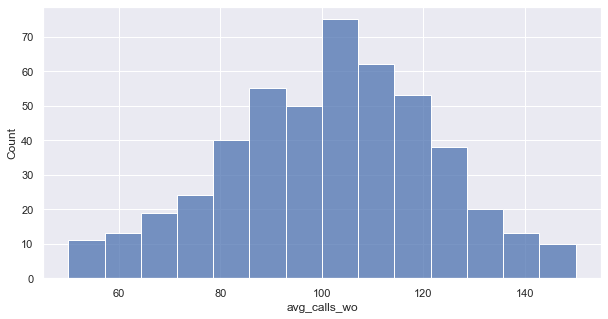

In [294]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='avg_calls_wo');

In [ ]:
# Average number of calls made by maximum number of churned per day is around 100

### Monthly bill

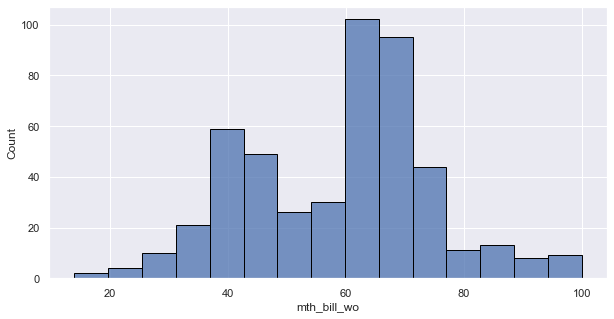

In [295]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='mth_bill_wo',edgecolor='black');

In [ ]:
#Average monthly bill of maximum number of Non churned customers lies between 50-60

### Overage fee

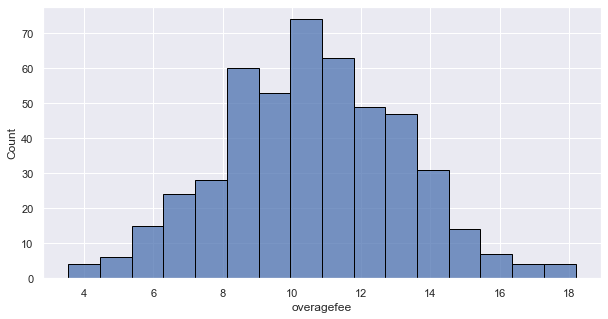

In [296]:
plt.figure(figsize=(10,5))
sns.histplot(data=churned,x='overagefee',edgecolor='black',);

In [ ]:
# Average overall fee of the maximum number of churned customers is around 10

### Roaming Minutes

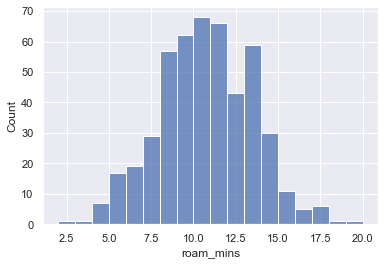

In [297]:
sns.histplot(data=churned,x='roam_mins');

In [ ]:
#Roaming minutes of the maximum churned customers is around 10-11 minutes

### 4. For the two set of customers (conrenew_flag=1 and conrenew_flag=0) observe the  distribution of below numeric variables and report any significant difference:
 

In [299]:
DF.groupby('conrenew_flag')['weeks_active_wo'].describe()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,,,,,,,,
0,323.0,104.071207,38.009044,10.0,79.5,104.0,132.5,200.0
1,3010.0,100.680399,39.590822,10.0,73.0,100.0,127.0,200.0


In [ ]:
# Maximum number of customers who didnot renewed their contract are active around 104 weeks
# Maximum number of customers who renewed their contract are active around 100 weeks
# People who didnot renewing their contract are more active than customers who renewed their contract, because they might have better service and are hesitating for next renewal(SO these customers might be new for the company on that particular year)

In [300]:
DF.groupby('conrenew_flag')['avg_talk_time_wo'].describe()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,,,,,,,,
0,323.0,187.845511,55.781732,50.0,148.2,188.9,228.65,305.0
1,3010.0,178.907176,53.267293,50.0,143.3,179.0,214.90,305.0


In [ ]:
# Maximum number of customers who didnot renewed their contract have a average tlak time of 187 minutes
## Maximum number of customers who renewed their contract have a average tlak time of 178 minutes
# For every percentile above people who did not renewed their contract have more average talktime than people who renewed their contract
# The reason for more average talk time for non-contract renewal than of contract renewal customers because there might be problem in signal during the conversation in a call after renewing the contract

In [301]:
DF.groupby('conrenew_flag')['avg_calls_wo'].describe()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,,,,,,,,
0,323.0,100.693498,20.975337,50.0,85.50,103.0,117.0,146.0
1,3010.0,100.461462,19.687067,50.0,87.25,101.0,114.0,150.0


In [ ]:
#There is no significant difference between average calls made by the customers who renewed their contract and also who didnot renewed their contract
# For maximum percentile customers who renewed their contract have made 19 calls more than of customers who didnot renewed their contract 
# By comparing average calls and average talktime,calls might be same for all of them but the talktime for contract renewed is less for who renewed their contract.This might due to the problems in call service provieded by the company after the renewal

In [302]:
DF.groupby('conrenew_flag')['mth_bill_wo'].describe()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,,,,,,,,
0,323.0,58.587926,17.308423,24.0,45.800,56.0,69.75,100.0
1,3010.0,56.018007,16.189974,14.0,44.925,53.0,66.00,100.0


In [ ]:
# For maximum number of customers of who renewed their contract and donot renewed their contract has a similar average monthly bill,i.e, around 56
# Both the customers got significant monthly bill

In [303]:
DF.groupby('conrenew_flag')['num_cs_calls'].describe()

,count,mean,std,min,25%,50%,75%,max
conrenew_flag,,,,,,,,
0,323.0,1.464396,1.337863,0.0,0.0,1.0,2.0,9.0
1,3010.0,1.573422,1.312855,0.0,1.0,1.0,2.0,9.0


In [ ]:
#25% of the contract renewed customers have made atleast a single customer service call
#25% of the customers who didnot renewed their contract didnot made a single customer service call 


### SECTION 5

In [305]:
pd.read_excel(r'C:\Users\rakes\Downloads\07 Customer Churn Case Study Data.xlsx',sheet_name='Data')

In [311]:
DF['total_bill']=DF['mth_bill_wo']+DF['overagefee']

In [312]:
new_DF.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag,total_bill
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0,98.87
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0,91.78
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0,58.06
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0,60.10
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0,48.42


### 1. What is the impact on revenue due to customer churn?

In [313]:
DF['total_bill'].sum()

221039.71

In [314]:
churned_new=DF[DF['churn_flag']==1]

In [315]:
churned_new['total_bill'].sum()

33691.95

In [316]:
non_churned_new=DF[DF['churn_flag']==0]


In [317]:
non_churned_new['total_bill'].sum()

187347.76

In [318]:
(non_churned_new['total_bill'].sum()/DF['total_bill'].sum())*100

84.75751257545534

In [319]:
(churned_new['total_bill'].sum()/DF['total_bill'].sum())*100

15.242487424544665

In [ ]:
#15 percentage of the revenue is lost than before after the customer churn

### OR

In [320]:
DF['mth_bill_wo'].sum()

187538.09999999998

In [321]:
churned['mth_bill_wo'].sum()

28561.0

In [322]:
non_churned['mth_bill_wo'].sum()

158977.1

In [323]:
round((churned['mth_bill_wo'].sum()/non_churned['mth_bill_wo'].sum())*100)

18

In [ ]:
#18 percentage of the revenue is lost than before after the customer churn

### Section 05: Open-ended questions and recommendation

### • Whether customer is renewing the contract or not

In [324]:
churned['conrenew_flag'].value_counts(normalize=True)

1    0.716356
0    0.283644
Name: conrenew_flag, dtype: float64

In [325]:
non_churned['conrenew_flag'].value_counts(normalize=True)

1    0.934737
0    0.065263
Name: conrenew_flag, dtype: float64

In [ ]:
#72% of the churned customers renewed their contract,So there might be facing internal issuses after the contract renewal

In [ ]:
#28% percentage of the churned customers didnot renewed their contract 
#And for Non-churned there are only 6% of customers who didnot renewed their contract
#Hence from above we can say that customers are hesitating for renewing the contract
#This can be minimized by giving disscounts on the renewal plans and can also adding minimum data along with the plan

### • Whether the customer has already made certain number of calls to Customer Care and may be considering an Operator switch

In [326]:
churned['num_cs_calls'].value_counts(normalize=True)

1    0.252588
0    0.190476
2    0.180124
4    0.157350
3    0.091097
5    0.082816
6    0.028986
7    0.010352
9    0.004141
8    0.002070
Name: num_cs_calls, dtype: float64

In [327]:
non_churned['num_cs_calls'].value_counts(normalize=True)

1    0.371579
2    0.235789
0    0.212281
3    0.135088
4    0.031579
5    0.009123
6    0.002807
7    0.001404
8    0.000351
Name: num_cs_calls, dtype: float64

In [ ]:
# 25% of Churned customers made one customer service call and 37% for Non-churned
#19% of Churned customers and 21% are not even made a single customer service call so,the company has to educate them how to use customer service
#18% for churned made two customer calls and 23% for non_churned customers
#15% of churned customers made four calls and for non-churned the percentage is only 3%
# so these 15% people are facing more issues and they knows how to contact customer service


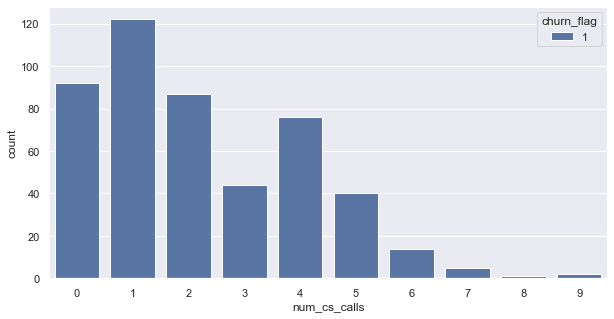

In [328]:

plt.figure(figsize=(10,5))
sns.countplot(data=churned,x='num_cs_calls',hue='churn_flag');


In [ ]:
#By comparing both churned and non_churned the company has to investigate and address common problems faced by the customers and  educate them to make use of customer service 

### • When the overage fees charged in the last 12 months exceeds a certain threshold

In [329]:
(churned['overagefee']>4).value_counts()

True     480
False      3
Name: overagefee, dtype: int64

In [330]:
(churned['overagefee']>4).value_counts(normalize=True)

True     0.993789
False    0.006211
Name: overagefee, dtype: float64

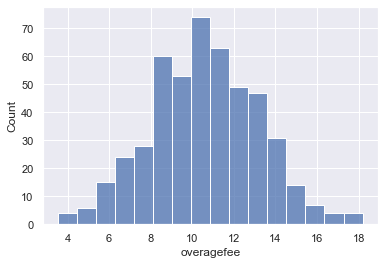

In [331]:
sns.histplot(data=churned,x='overagefee');

In [ ]:
#Churning of the customers started after 4 of Overagefee
#Maximum of the churned customers has 10 of the Overagefee
#This can be minimized by either decreasing the charges on Overagefee for 4-6 overagefee or allowing the customers to use the service from 4-10 overagefee for free

### • When the monthly bill exceeds a certain amount

In [332]:
(churned['mth_bill_wo']>15).value_counts()

True     482
False      1
Name: mth_bill_wo, dtype: int64

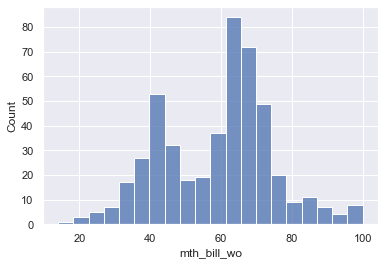

In [333]:
sns.histplot(data=churned,x='mth_bill_wo',bins=20);

In [334]:
churned['mth_bill_wo'].describe()

count    483.000000
mean      59.132505
std       15.907251
min       14.000000
25%       45.000000
50%       63.000000
75%       69.000000
max      100.000000
Name: mth_bill_wo, dtype: float64

In [335]:
ss=churned[(churned['mth_bill_wo']>15) | (churned['avg_talk_time_wo'])]

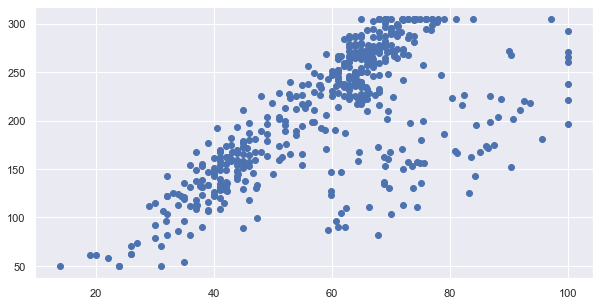

In [336]:
plt.figure(figsize=(10,5))
plt.scatter(ss['mth_bill_wo'],ss['avg_talk_time_wo']);

In [ ]:
#Customers whose monthly bill more than 60 are more and their talk time is in between 220-280 minutes

In [ ]:
#Churning of the customers have started from 15 
#Maxiimum churned people have monthly bill around 60
#Company has to identify whose monthly bill is between 15-60 and has to provide them with extra talktime

In [337]:
(churned_new['total_bill']).describe()

count    483.00000
mean      69.75559
std       17.09720
min       21.98000
25%       54.33000
50%       73.79000
75%       80.73000
max      113.25000
Name: total_bill, dtype: float64

In [338]:
non_churned_new['total_bill'].describe()

count    2850.000000
mean       65.736056
std        17.157311
min        19.380000
25%        53.927500
50%        63.135000
75%        75.255000
max       116.750000
Name: total_bill, dtype: float64

In [ ]:
#By checking both for churned and non-churned customers, most churned customers having total bill more than non-churned customers
#This concludes that the Telecom company losing high paid customers

### 4. What are the possible reasons of non-renewal of contract?

In [339]:
DF['conrenew_flag'].value_counts()

1    3010
0     323
Name: conrenew_flag, dtype: int64

In [340]:
churned['conrenew_flag'].value_counts()

1    346
0    137
Name: conrenew_flag, dtype: int64

In [341]:
con_ren=DF[DF['conrenew_flag']==1]
non_con_ren=DF[DF['conrenew_flag']==1]


In [342]:
con_ren.describe().T

,count,mean,std,min,25%,50%,75%,max
index,3010.0,1668.429236,962.400067,0.00,843.2500,1670.50,2501.7500,3332.00
conrenew_flag,3010.0,1.000000,0.000000,1.00,1.0000,1.00,1.0000,1.00
dataplan_flag,3010.0,0.275748,0.446964,0.00,0.0000,0.00,1.0000,1.00
data_usage,3010.0,0.808462,1.261818,0.00,0.0000,0.00,1.7600,4.75
num_cs_calls,3010.0,1.573422,1.312855,0.00,1.0000,1.00,2.0000,9.00
overagefee,3010.0,10.035621,2.523754,0.00,8.3025,10.07,11.7600,18.09
roam_mins,3010.0,10.195349,2.798937,0.00,8.4000,10.20,12.1000,18.90
churn_flag,3010.0,0.114950,0.319015,0.00,0.0000,0.00,0.0000,1.00
avg_talk_time_wo,3010.0,178.907176,53.267293,50.00,143.3000,179.00,214.9000,305.00
avg_calls_wo,3010.0,100.461462,19.687067,50.00,87.2500,101.00,114.0000,150.00


In [343]:
non_con_ren.describe().T

,count,mean,std,min,25%,50%,75%,max
index,3010.0,1668.429236,962.400067,0.00,843.2500,1670.50,2501.7500,3332.00
conrenew_flag,3010.0,1.000000,0.000000,1.00,1.0000,1.00,1.0000,1.00
dataplan_flag,3010.0,0.275748,0.446964,0.00,0.0000,0.00,1.0000,1.00
data_usage,3010.0,0.808462,1.261818,0.00,0.0000,0.00,1.7600,4.75
num_cs_calls,3010.0,1.573422,1.312855,0.00,1.0000,1.00,2.0000,9.00
overagefee,3010.0,10.035621,2.523754,0.00,8.3025,10.07,11.7600,18.09
roam_mins,3010.0,10.195349,2.798937,0.00,8.4000,10.20,12.1000,18.90
churn_flag,3010.0,0.114950,0.319015,0.00,0.0000,0.00,0.0000,1.00
avg_talk_time_wo,3010.0,178.907176,53.267293,50.00,143.3000,179.00,214.9000,305.00
avg_calls_wo,3010.0,100.461462,19.687067,50.00,87.2500,101.00,114.0000,150.00


In [344]:
con_ren['dataplan_flag'].value_counts(normalize=True)

0    0.724252
1    0.275748
Name: dataplan_flag, dtype: float64

In [345]:
non_con_ren['dataplan_flag'].value_counts(normalize=True)

0    0.724252
1    0.275748
Name: dataplan_flag, dtype: float64

In [346]:
con_ren['num_cs_calls'].value_counts()

1    1069
2     697
0     614
3     391
4     145
5      60
6      22
7       9
8       2
9       1
Name: num_cs_calls, dtype: int64

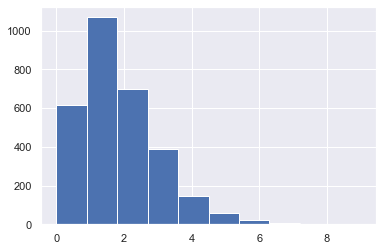

In [347]:
plt.hist(con_ren['num_cs_calls']);

In [348]:
con_ren.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo,avg_overallfee,total_bill
0,0,1,1,2.70,1,9.87,10.0,0,265.1,110,89.0,128,98.87,98.87
1,1,1,1,3.70,1,9.78,13.7,0,161.6,123,82.0,107,91.78,91.78
2,2,1,0,0.00,0,6.06,12.2,0,243.4,114,52.0,137,58.06,58.06
6,6,1,1,2.03,3,17.43,7.5,0,218.2,88,87.3,121,104.73,104.73
8,8,1,0,0.19,1,17.58,8.7,0,184.5,97,63.9,117,81.48,81.48


### EXTRAS

In [349]:
r=churned.conrenew_flag.value_counts(normalize=True)
r

1    0.716356
0    0.283644
Name: conrenew_flag, dtype: float64

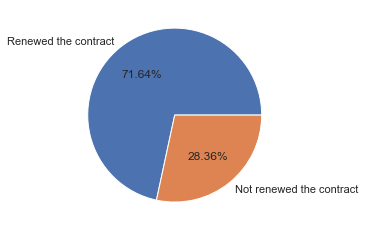

In [350]:
plt.pie(r,labels=['Renewed the contract','Not renewed the contract'],autopct='%1.2f%%');

In [351]:
# 71 percentage of the churned customers did renewed their contract recently
# 28 percentage of the churned customers didnot renewed their contract recently

In [352]:
churned.conrenew_flag.value_counts()

1    346
0    137
Name: conrenew_flag, dtype: int64

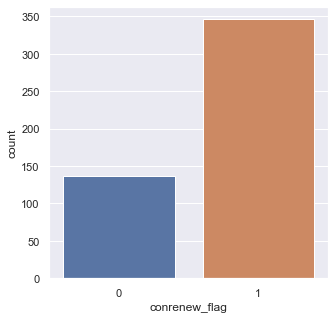

In [353]:
plt.figure(figsize=(5,5))
sns.countplot(data=churned,x='conrenew_flag');

In [354]:
# For churned customers 346 of them have recently renewed the contract
# And 137 of the churned customers didnot renewed their contract recently

In [355]:
s=non_churned.conrenew_flag.value_counts(normalize=True)
s

1    0.934737
0    0.065263
Name: conrenew_flag, dtype: float64

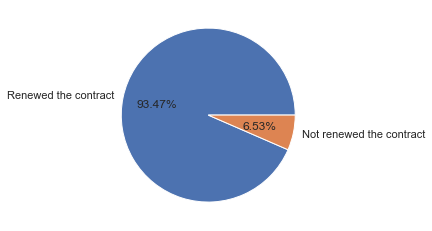

In [356]:
plt.pie(s,labels=['Renewed the contract','Not renewed the contract'],autopct='%1.2f%%');

In [357]:
# 93 percentage of the non-churned customers did renewed their contract recently
# 6 percentage of the non-churned customers didnot renewed their contract recently

In [358]:
non_churned.conrenew_flag.value_counts()

1    2664
0     186
Name: conrenew_flag, dtype: int64

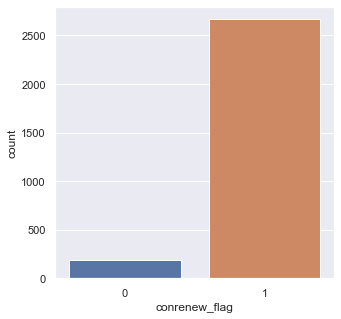

In [359]:
plt.figure(figsize=(5,5))
sns.countplot(data=non_churned,x='conrenew_flag');

In [360]:
# For Non-churned customers 2664 of them have recently renewed the contract
# And 186 of the churned customers didnot renewed their contract recently

In [361]:
a=churned.dataplan_flag.value_counts(normalize=True)
a

0    0.834369
1    0.165631
Name: dataplan_flag, dtype: float64

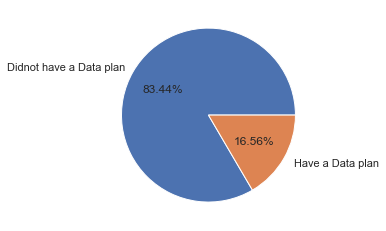

In [362]:
plt.pie(a,labels=['Didnot have a Data plan',' Have a Data plan'],autopct='%1.2f%%');

In [363]:

# 16 percentage of the churned customers  have a Data plan
# 83 percentage of the churned customers didnot have a Data plan

In [364]:
pd.crosstab(DF['conrenew_flag']==1,DF['num_cs_calls'],margins=True)

num_cs_calls,0,1,2,3,4,5,6,7,8,9,All
conrenew_flag,,,,,,,,,,,
False,83,112,62,38,21,6,0,0,0,1,323
True,614,1069,697,391,145,60,22,9,2,1,3010
All,697,1181,759,429,166,66,22,9,2,2,3333


In [365]:
churned.dataplan_flag.value_counts()

0    403
1     80
Name: dataplan_flag, dtype: int64

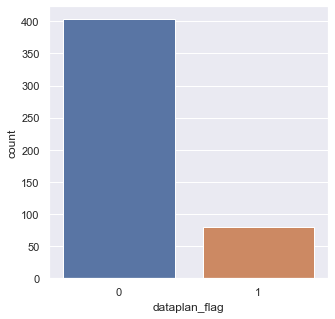

In [366]:
plt.figure(figsize=(5,5))
sns.countplot(data=churned,x='dataplan_flag');

In [367]:


# And 80 of the churned customers have a Data plan
# For churned customers 403 of them didnot have a Data plan

In [368]:
f=non_churned.dataplan_flag.value_counts(normalize=True)
f

0    0.704561
1    0.295439
Name: dataplan_flag, dtype: float64

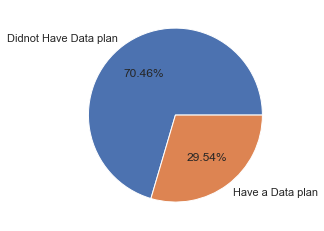

In [369]:
plt.pie(f,labels=['Didnot Have Data plan','Have a Data plan'],autopct='%1.2f%%');

In [370]:
# 29 percentage of the non-churned customers have a Data plan
# 70 percentage of the non-churned customers didnot have a Data plan


In [371]:
non_churned.dataplan_flag.value_counts()

0    2008
1     842
Name: dataplan_flag, dtype: int64

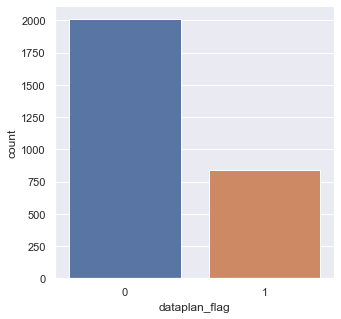

In [372]:
plt.figure(figsize=(5,5))
sns.countplot(data=non_churned,x='dataplan_flag');

In [373]:
# For non-churned customers 842 of them have a Data plan
# And 2008 of the non-churned customers didnot have a Data plan

In [374]:
churned.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo
10,10,1,0,0.29,4,11.43,12.7,1,129.1,137,44.9,65
15,15,1,0,0.00,4,15.89,5.4,1,305.0,67,84.0,161
21,21,1,0,0.00,5,8.50,5.7,1,62.4,89,26.0,77
33,33,1,0,0.00,1,12.62,11.8,1,249.6,118,64.0,12
41,41,0,1,3.94,0,10.20,14.6,1,173.1,85,86.4,135


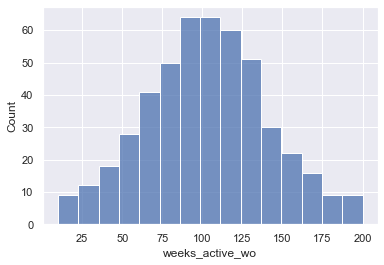

In [376]:
sns.histplot(data=churned,x='weeks_active_wo');

In [ ]:
# Maximum Churned customers are being active upto 100-120 weeks

In [ ]:
sns.countplot(data=churned,x='conrenew_flag');

In [ ]:
sns.countplot(data=churned,x='dataplan_flag');

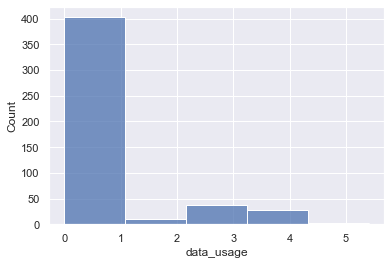

In [377]:
sns.histplot(data=churned,x='data_usage',bins=5);

In [378]:
# Maximum number of churned customers did not use any amount of Data

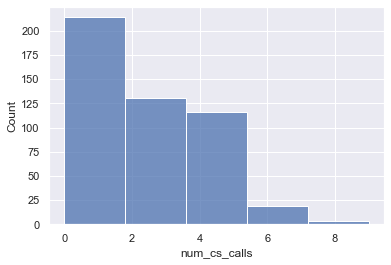

In [379]:
sns.histplot(data=churned,x='num_cs_calls',bins=5);

In [380]:
# Maximum number of churned customers did not made any single call

In [381]:
churned.num_cs_calls.value_counts(normalize=True)

1    0.252588
0    0.190476
2    0.180124
4    0.157350
3    0.091097
5    0.082816
6    0.028986
7    0.010352
9    0.004141
8    0.002070
Name: num_cs_calls, dtype: float64

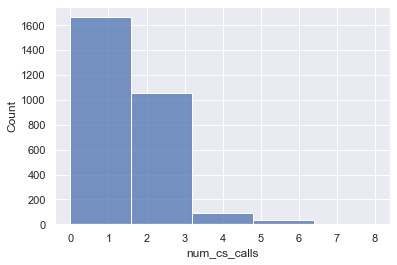

In [382]:
sns.histplot(data=non_churned,x='num_cs_calls',bins=5);

In [383]:
non_churned.num_cs_calls.value_counts(normalize=True)

1    0.371579
2    0.235789
0    0.212281
3    0.135088
4    0.031579
5    0.009123
6    0.002807
7    0.001404
8    0.000351
Name: num_cs_calls, dtype: float64

### QUESTION 4

In [384]:
DF.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo,avg_overallfee,total_bill
0,0,1,1,2.7,1,9.87,10.0,0,265.1,110,89.0,128,98.87,98.87
1,1,1,1,3.7,1,9.78,13.7,0,161.6,123,82.0,107,91.78,91.78
2,2,1,0,0.0,0,6.06,12.2,0,243.4,114,52.0,137,58.06,58.06
3,3,0,0,0.0,2,3.10,6.6,0,299.4,71,57.0,84,60.10,60.10
4,4,0,0,0.0,3,7.42,10.1,0,166.7,113,41.0,75,48.42,48.42


In [385]:
con_ren=DF[DF.conrenew_flag==1]
con_ren.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo,avg_overallfee,total_bill
0,0,1,1,2.70,1,9.87,10.0,0,265.1,110,89.0,128,98.87,98.87
1,1,1,1,3.70,1,9.78,13.7,0,161.6,123,82.0,107,91.78,91.78
2,2,1,0,0.00,0,6.06,12.2,0,243.4,114,52.0,137,58.06,58.06
6,6,1,1,2.03,3,17.43,7.5,0,218.2,88,87.3,121,104.73,104.73
8,8,1,0,0.19,1,17.58,8.7,0,184.5,97,63.9,117,81.48,81.48


In [386]:
non_con_ren=DF[DF.conrenew_flag==0]
non_con_ren.head()

,index,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,overagefee,roam_mins,churn_flag,avg_talk_time_wo,avg_calls_wo,mth_bill_wo,weeks_active_wo,avg_overallfee,total_bill
3,3,0,0,0.00,2,3.10,6.6,0,299.4,71,57.0,84,60.10,60.10
4,4,0,0,0.00,3,7.42,10.1,0,166.7,113,41.0,75,48.42,48.42
5,5,0,0,0.00,0,11.03,6.3,0,223.4,98,57.0,118,68.03,68.03
7,7,0,0,0.00,0,5.16,7.1,0,157.0,79,36.0,147,41.16,41.16
9,9,0,1,3.02,0,11.10,11.2,0,258.6,84,93.2,141,104.30,104.30


In [387]:
con_ren.describe().T

,count,mean,std,min,25%,50%,75%,max
index,3010.0,1668.429236,962.400067,0.00,843.2500,1670.50,2501.7500,3332.00
conrenew_flag,3010.0,1.000000,0.000000,1.00,1.0000,1.00,1.0000,1.00
dataplan_flag,3010.0,0.275748,0.446964,0.00,0.0000,0.00,1.0000,1.00
data_usage,3010.0,0.808462,1.261818,0.00,0.0000,0.00,1.7600,4.75
num_cs_calls,3010.0,1.573422,1.312855,0.00,1.0000,1.00,2.0000,9.00
overagefee,3010.0,10.035621,2.523754,0.00,8.3025,10.07,11.7600,18.09
roam_mins,3010.0,10.195349,2.798937,0.00,8.4000,10.20,12.1000,18.90
churn_flag,3010.0,0.114950,0.319015,0.00,0.0000,0.00,0.0000,1.00
avg_talk_time_wo,3010.0,178.907176,53.267293,50.00,143.3000,179.00,214.9000,305.00
avg_calls_wo,3010.0,100.461462,19.687067,50.00,87.2500,101.00,114.0000,150.00


In [388]:
non_con_ren.describe().T

,count,mean,std,min,25%,50%,75%,max
index,323.0,1643.362229,962.548314,3.00,780.500,1617.00,2467.500,3331.00
conrenew_flag,323.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
dataplan_flag,323.0,0.284830,0.452034,0.00,0.000,0.00,1.000,1.00
data_usage,323.0,0.891146,1.369482,0.00,0.000,0.00,2.175,5.40
num_cs_calls,323.0,1.464396,1.337863,0.00,0.000,1.00,2.000,9.00
overagefee,323.0,10.199350,2.644023,3.04,8.390,10.15,11.970,18.19
roam_mins,323.0,10.628173,2.697787,1.30,9.000,10.80,12.200,20.00
churn_flag,323.0,0.424149,0.494980,0.00,0.000,0.00,1.000,1.00
avg_talk_time_wo,323.0,187.845511,55.781732,50.00,148.200,188.90,228.650,305.00
avg_calls_wo,323.0,100.693498,20.975337,50.00,85.500,103.00,117.000,146.00


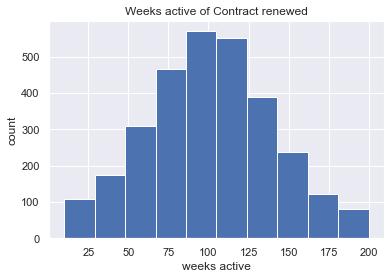

In [390]:
plt.hist(con_ren['weeks_active_wo']);
plt.xlabel('weeks active')
plt.ylabel('count')
plt.title('Weeks active of Contract renewed');

In [ ]:
#Maximum number of customers who renewed their contract are identified to be active around 100 weeks

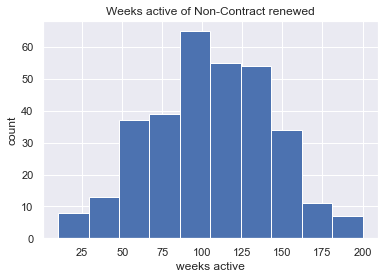

In [391]:
plt.hist(non_con_ren['weeks_active_wo']);
plt.xlabel('weeks active')
plt.ylabel('count')
plt.title('Weeks active of Non-Contract renewed');

In [ ]:
# Maximum number of customers who didnot renewed their contract are identified to be active around 105 weeks

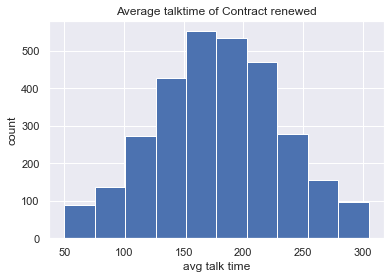

In [392]:
plt.hist(con_ren['avg_talk_time_wo']);
plt.xlabel('avg talk time')
plt.ylabel('count')
plt.title('Average talktime of Contract renewed');

In [ ]:
# Average talk time of the maximum number of people who renewed their contract is in between 150-200 minutes,i.e,178

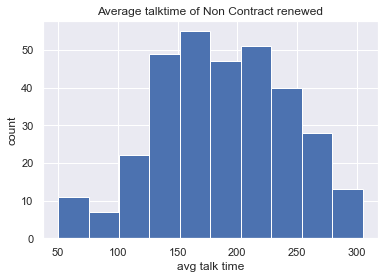

In [393]:
plt.hist(non_con_ren['avg_talk_time_wo']);
plt.xlabel('avg talk time')
plt.ylabel('count')
plt.title('Average talktime of Non Contract renewed');

In [ ]:
# Average talk time of the maximum number of people who didnot renewed their contract is in between 160-190 minutes,i.e,187

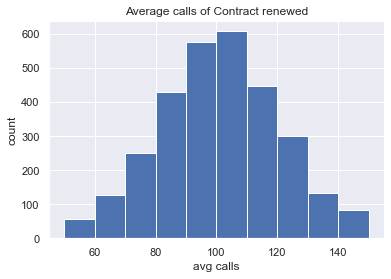

In [394]:
plt.hist(con_ren['avg_calls_wo']);
plt.xlabel('avg calls')
plt.ylabel('count')
plt.title('Average calls of Contract renewed');

In [ ]:
# Average number of calls of the maximum number of people who renewed their contract is around 100

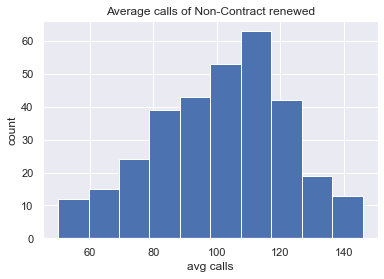

In [395]:
plt.hist(non_con_ren['avg_calls_wo']);
plt.xlabel('avg calls')
plt.ylabel('count')
plt.title('Average calls of Non-Contract renewed');

In [ ]:
# Average number of calls of the maximum number of people who didnot renewed their contract is also around 100

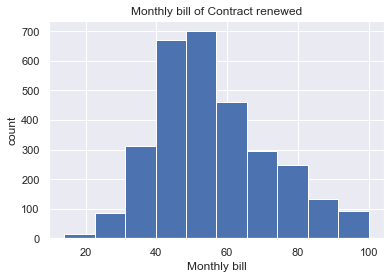

In [396]:
plt.hist(con_ren['mth_bill_wo']);
plt.xlabel('Monthly bill')
plt.ylabel('count')
plt.title('Monthly bill of Contract renewed');

In [ ]:
# Monthly bill of maximum number of customers who renewed their contract is around 50

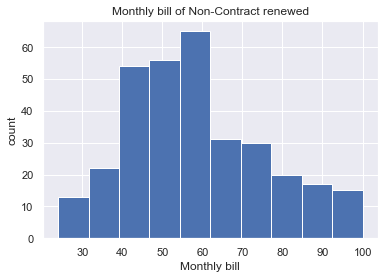

In [397]:
plt.hist(non_con_ren['mth_bill_wo']);
plt.xlabel('Monthly bill')
plt.ylabel('count')
plt.title('Monthly bill of Non-Contract renewed');

In [ ]:
# Monthly bill of maximum number of customers who didnot renewed their contract is around 60

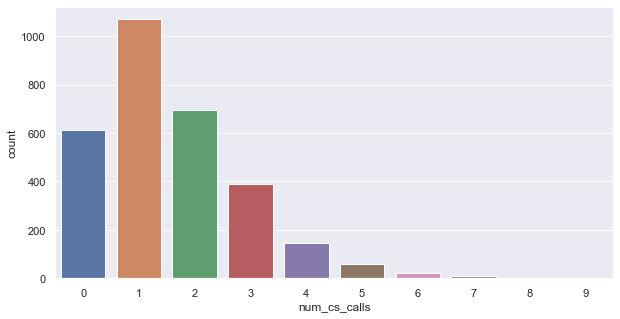

In [398]:
plt.figure(figsize=(10,5))
sns.countplot(data=con_ren,x='num_cs_calls');

In [ ]:
# Maximum number of people who renewed their contract has only made one customer service call

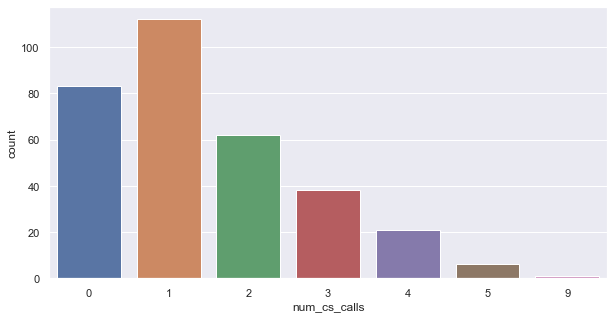

In [399]:
plt.figure(figsize=(10,5))
sns.countplot(data=non_con_ren,x='num_cs_calls');

In [ ]:
# Maximum number of people who didnot renewed their contract has also made only one customer service call

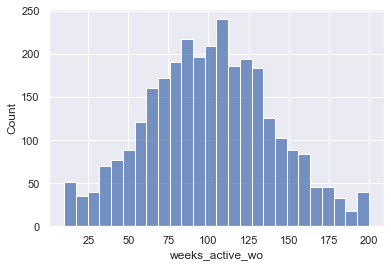

In [400]:
sns.histplot(data=con_ren,x='weeks_active_wo');

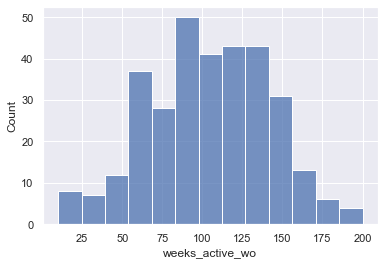

In [401]:
sns.histplot(data=non_con_ren,x='weeks_active_wo');